In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pydataset import data
from env import user, password,host
def get_db_url(user,password,host,db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
url =  get_db_url(user,password,host, 'chipotle')
orders_df = pd.read_sql('select * from orders', url)

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


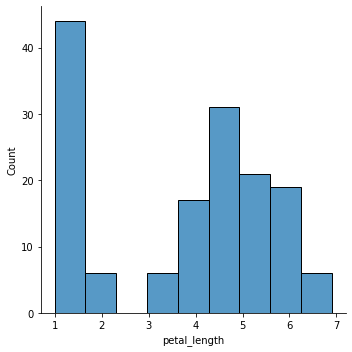

In [39]:
#1 
sns.displot(data = iris, x = 'petal_length')

In [21]:
#2 is there a correlation between petal length and width
iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

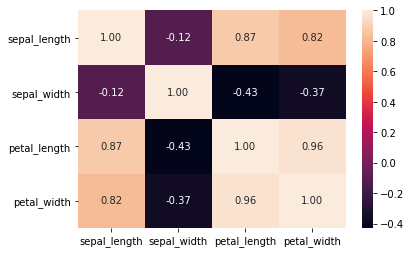

In [24]:
sns.heatmap(iris.corr(), annot = True, fmt ='.02f', cmap = 'rocket')

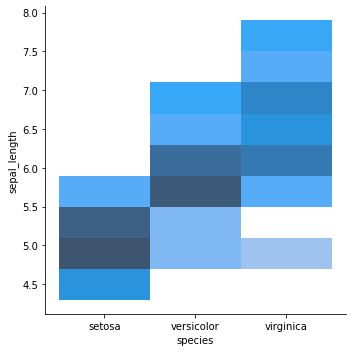

In [41]:
#3 predicting species based on sepal length
sns.displot(data=iris, x = 'species', y = 'sepal_length')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

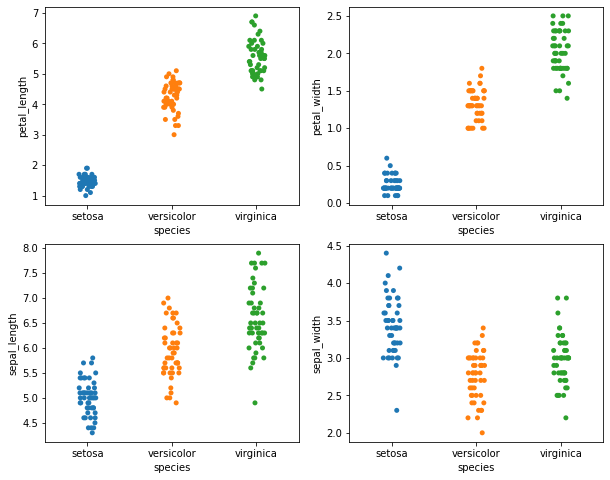

In [64]:
#4 what feautures best predict species
fig, ax = plt.subplots(2,2, figsize = (10,8))
sns.stripplot(data=iris, x = 'species', y = 'petal_length', ax = ax[0,0])
sns.stripplot(data=iris, x = 'species', y = 'petal_width', ax = ax[0,1])
sns.stripplot(data=iris, x = 'species', y = 'sepal_length', ax = ax[1,0])
sns.stripplot(data=iris, x = 'species', y = 'sepal_width', ax = ax[1,1])


In [65]:
#Exercise 2  

In [54]:
#1
anscombe = sns.load_dataset('anscombe')
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

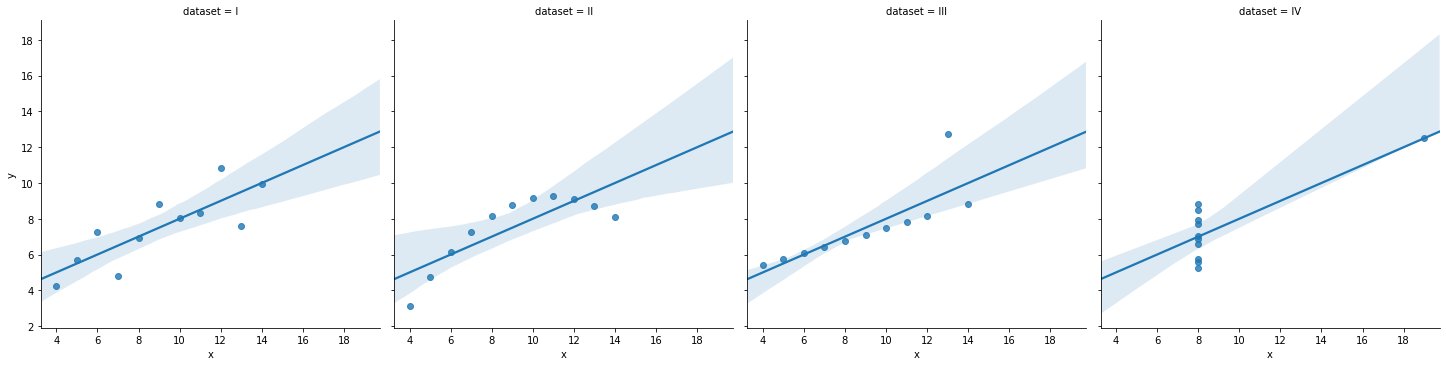

In [58]:
sns.lmplot(data = anscombe, x = 'x', y = 'y', col = 'dataset', truncate = False)

In [59]:
InsectSprays = data('InsectSprays')

<AxesSubplot:xlabel='spray', ylabel='count'>

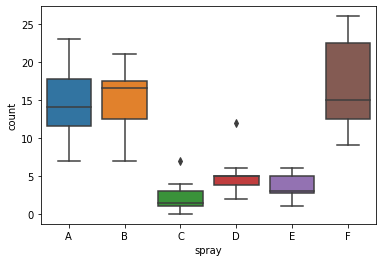

In [134]:
sns.boxplot(data= InsectSprays , y='count' , x = 'spray')

In [60]:
swiss_df = data('swiss')

In [61]:
mean = swiss_df.Catholic.mean()
mean

41.14382978723404

In [145]:
swiss_df['is_catholic'] = (swiss_df.Catholic > mean)

<AxesSubplot:>

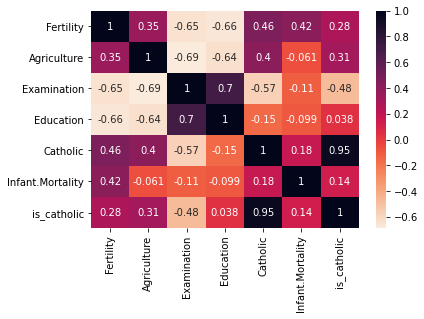

In [153]:
#does catholic influence fertility. slight influence, yes
sns.heatmap(swiss_df.corr(), cmap='rocket_r', annot = True)

#Fertilily most correlated with educa

In [68]:
#4 
orders_df.item_price = orders_df.item_price.str.replace('$','').astype(float)

In [69]:
item_sum = orders_df.groupby('item_name').item_price.sum().sort_values(ascending = False).head(4)
item_sum

item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: item_price, dtype: float64

In [70]:
df_var = pd.DataFrame({'Item': item_sum.index, 'Revenue': item_sum})

In [71]:
df_var

,Item,Revenue
item_name,,
Chicken Bowl,Chicken Bowl,7342.73
Chicken Burrito,Chicken Burrito,5575.82
Steak Burrito,Steak Burrito,3851.43
Steak Bowl,Steak Bowl,2260.19


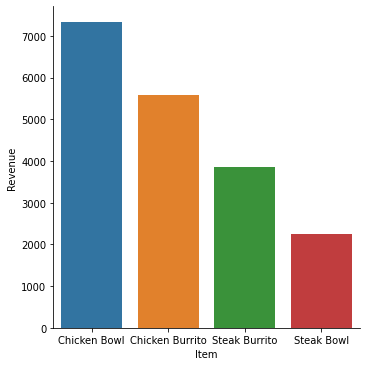

In [134]:
sns.catplot(data=df_var , x='Item' , y = 'Revenue', kind= 'bar')

In [64]:
#5
sleepstudy = data('sleepstudy')

In [63]:
sleepstudy = data('sleepstudy')

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

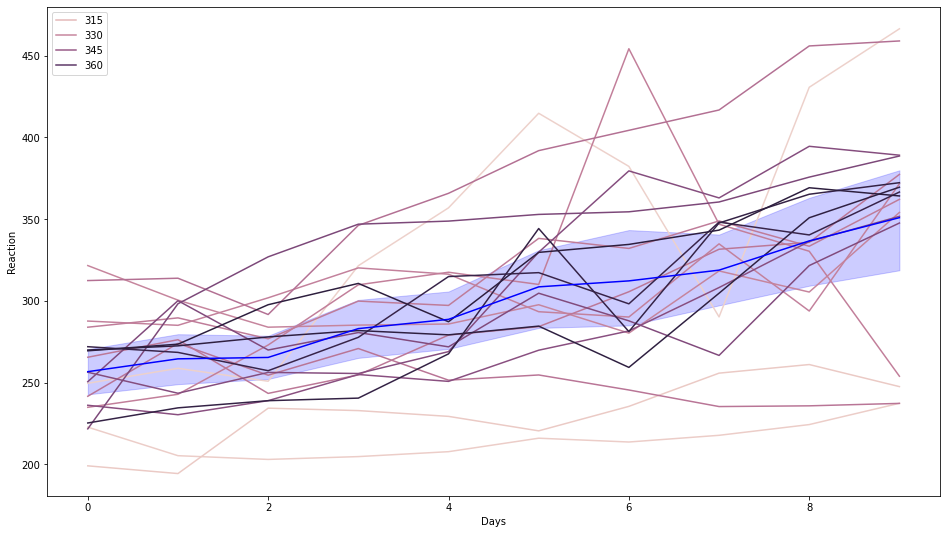

In [72]:
plt.figure(figsize=(16,9))
sns.lineplot(data=sleepstudy, x='Days', y ='Reaction' ,hue = 'Subject' )
sns.lineplot(data=sleepstudy, x='Days', y ='Reaction' ,color = 'blue' , estimator= 'mean')